# Recommendor
### Content based - eg:Netflix
### Collab based - eg: Amazon product which suggests accesories, phone and case,headphone etc

Will try to  make a recommendation system with python 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_name = ['u_id','item_id','rating','timestamp']
data = pd.read_csv('u.data.txt', sep='\t', names=column_name)

In [3]:
data.head(2)

,u_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [4]:
data_title = pd.read_csv('Movie_id_Titles.txt')

In [5]:
data_title.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [6]:
movie_df = pd.merge(data,data_title,on='item_id')

In [7]:
movie_df.head(3)

,u_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


## Data exploration
visualization

In [8]:
movie_df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

### Note
As we can see, even when we sort according to ratings, we have a disrepancy, we cannot just decide based on the rating score(by mean), we have to also take into consideration the number of people who have voted(count), that will give us a clearer picture

In [10]:
rating_df = pd.DataFrame(movie_df.groupby('title')['rating'].mean())

In [11]:
rating_df.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
rating_df['Number of rating'] = movie_df.groupby('title')['rating'].count()

In [13]:
rating_df.sort_values(by=['Number of rating'],ascending=False).head()

,rating,Number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


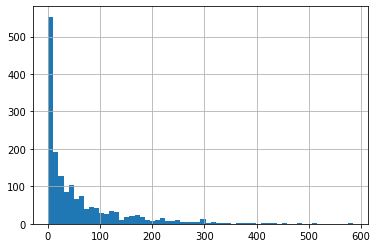

In [14]:
rating_df['Number of rating'].hist(bins=60)

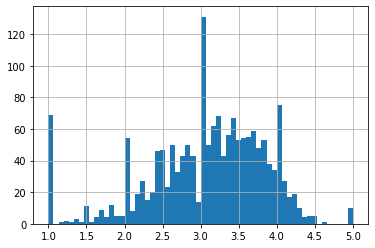

In [15]:
rating_df['rating'].hist(bins=60)

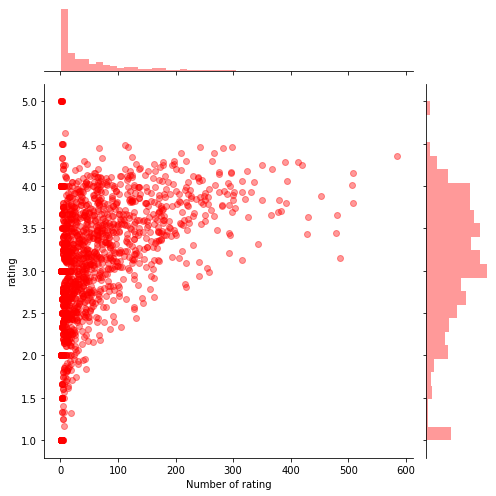

In [16]:
sns.jointplot(rating_df['Number of rating'],rating_df['rating'],height=7,alpha=0.4,color='red')
#alpha controls the transparency

# Recommeding 
We will pivot the users with title\
We need this matrix to find correlation with our ratings dataframe


In [17]:
movpiv_df = movie_df.pivot_table(index='u_id',columns='title',values='rating')

In [18]:
movpiv_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
u_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rating_df.sort_values(by=['Number of rating'],ascending=False).head(2)

,rating,Number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509


Lets select two movies
#Back to the Future (1985)
#Shawshank Redemption, The (1994)

In [20]:
#lets get the ratings
bttf_rating = movpiv_df['Back to the Future (1985)']
sr_rating = movpiv_df['Shawshank Redemption, The (1994)']

In [22]:
#corrwith() to get correlation between two series
similar_bttf = movpiv_df.corrwith(bttf_rating)
similar_sr = movpiv_df.corrwith(sr_rating)

### converting the series to dataframe

**When inplace = True , the data is modified in place,
which means it will return nothing and the dataframe is now updated.
When inplace = False , which is the default,
then the operation is performed and it returns a copy of the object. You then need to save it to something

In [23]:
similar_bttf_df = pd.DataFrame(similar_bttf,columns=['Correlation'])
similar_bttf_df.dropna(inplace = True)
similar_bttf_df.head(4)

,Correlation
title,
'Til There Was You (1997),0.300000
1-900 (1994),-0.944911
101 Dalmatians (1996),0.246338
12 Angry Men (1957),0.145780


In [24]:
similar_bttf_df.sort_values('Correlation',ascending=False).head(5)

,Correlation
title,
Metisse (Café au Lait) (1993),1.0
Man of the Year (1995),1.0
"Newton Boys, The (1998)",1.0
Dark City (1998),1.0
"Second Jungle Book: Mowgli & Baloo, The (1997)",1.0


In [27]:
similar_bttf_df = similar_bttf_df.join(rating_df['Number of rating'])

In [33]:
similar_bttf_df[similar_bttf_df['Number of rating']>100].sort_values('Correlation', ascending = False).head()

,Correlation,Number of rating
title,,
Back to the Future (1985),1.000000,350
Speed (1994),0.567509,230
Pretty Woman (1990),0.535240,164
Michael (1996),0.523826,119
"Frighteners, The (1996)",0.523183,115


### for shawshank redemption

In [34]:
similar_sr_df = pd.DataFrame(similar_sr, columns=['Correlation'])

In [44]:
similar_sr_df.dropna(inplace=True)
similar_sr_df = similar_sr_df.join(rating_df['Number of rating'])

In [48]:
similar_sr_df[similar_sr_df['Number of rating']>100].sort_values('Correlation',ascending = False).head()

,Correlation,Number of rating
title,,
"Shawshank Redemption, The (1994)",1.000000,283
Happy Gilmore (1996),0.467091,149
Glory (1989),0.461662,171
Austin Powers: International Man of Mystery (1997),0.455807,130
"River Wild, The (1994)",0.445034,146


The higher the correlation, the system will reccomend that movie for the viewer who watches Back to the future or shawshank redemption..\
for someone who watches Shwashank redemprtion the next movie recommended will be Happy Gilmore (1996).. and so on